In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import pystan as stan

In [2]:
%load_ext jupyterstan

In [3]:
# Python code 2.1
ways = [0, 3, 8, 9, 0]
[way/sum(ways) for way in ways]

[0.0, 0.15, 0.4, 0.45, 0.0]

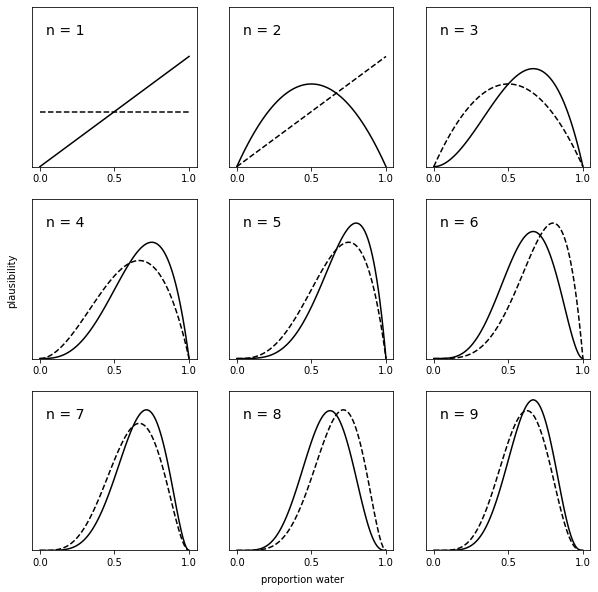

In [4]:
# Figure 2.5
data = [1, 0, 1, 1, 1, 0, 1, 0, 1]
a, b = 1, 1
x = np.linspace(0, 1, 100)
fig, axes = plt.subplots(nrows = 3, ncols = 3,
                        figsize=(10,10))
idx = 0
for i in [0, 1, 2]:
    for j in [0, 1, 2]:
        y = stats.beta.pdf(x, a=a, b=b)
        axes[i, j].plot(x, y, linestyle = "--", color = "black")
        if data[idx] == 1:
            a += 1
        else:
            b += 1
        idx += 1
        y = stats.beta.pdf(x, a=a, b=b)
        axes[i, j].plot(x, y, color = "black")
        axes[i, j].set_yticks([])
        axes[i, j].set_xticks([0, .5, 1])
        axes[i, j].set_ylim((0, 2.9))
        plt.text(0.2, 0.85, f"n = {idx}", ha='center', va='center', fontsize=14,
                 transform=axes[i, j].transAxes)
fig.text(0.5, 0.08, 'proportion water', ha='center')
fig.text(0.09, 0.5, 'plausibility', va='center', rotation='vertical')
plt.show()

In [5]:
# Python code 2.2
stats.binom.pmf(6, 9, .5)

0.16406250000000006

In [6]:
# Python code 2.3
p_grid = np.linspace(0, 1, 20)
prior = [1]*20
likelihood = stats.binom.pmf(6, 9, p_grid)
unstd_posterior = likelihood * prior
posterior = unstd_posterior / sum(unstd_posterior)

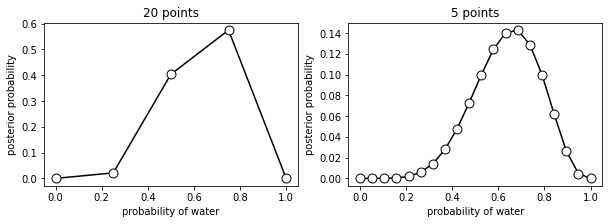

In [7]:
# Python code 2.4
# Figure 2.7
fig, axes = plt.subplots(nrows = 1, ncols = 2,
                        figsize=(10, 3))
axes[1].plot(p_grid, posterior, color = "black", zorder=0)
axes[1].scatter(p_grid, posterior, facecolors='white', edgecolors='black', s = 80, zorder=10)
axes[1].set_title("5 points")
axes[1].set_xlabel("probability of water")
axes[1].set_ylabel("posterior probability")

p_grid = np.linspace(0, 1, 5)
prior = [1]*5
likelihood = stats.binom.pmf(6, 9, p_grid)
unstd_posterior = likelihood * prior
posterior = unstd_posterior / sum(unstd_posterior)

axes[0].plot(p_grid, posterior, color = "black", zorder = 0)
axes[0].scatter(p_grid, posterior, facecolors='white', edgecolors='black', s = 80, zorder=10)
axes[0].set_title("20 points")
axes[0].set_xlabel("probability of water")
axes[0].set_ylabel("posterior probability")

plt.show()

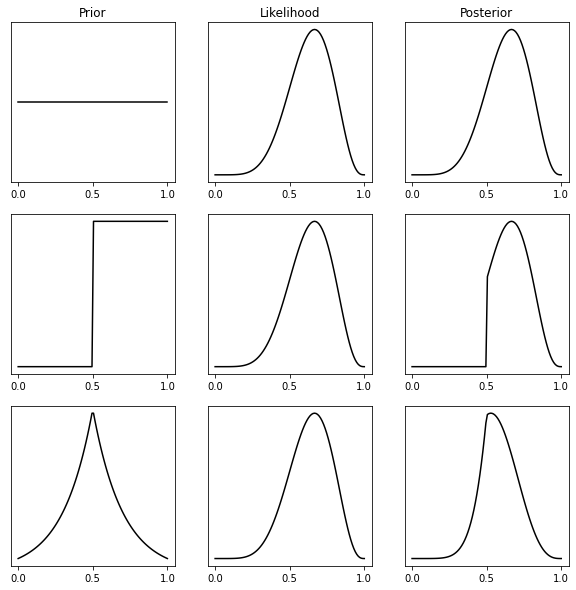

In [8]:
# Python code 2.5
# Figure 2.6
fig, axes = plt.subplots(nrows = 3, ncols = 3,
                        figsize=(10, 10))

likelihood = stats.beta.pdf(x, a=a, b=b)
prior = [1] * len(likelihood)
axes[0, 0].plot(x, prior, color = "black")
axes[0, 1].plot(x, likelihood, color = "black")
axes[0, 2].plot(x, prior * likelihood, color = "black")
axes[0, 0].set_title("Prior")
axes[0, 1].set_title("Likelihood")
axes[0, 2].set_title("Posterior")

prior = [1 if i >= .5 else 0 for i in x]
axes[1, 0].plot(x, prior, color = "black")
axes[1, 1].plot(x, likelihood, color = "black")
axes[1, 2].plot(x, prior * likelihood, color = "black")

prior = [math.exp(-5*abs(i - .5)) for i in x]
axes[2, 0].plot(x, prior, color = "black")
axes[2, 1].plot(x, likelihood, color = "black")
axes[2, 2].plot(x, prior * likelihood, color = "black")

for i in range(3):
    for j in range(3):
        axes[i, j].set_yticks([])
        axes[i, j].set_xticks([0, .5, 1])

plt.show()

In [9]:
%%stan globe_qa
data {
    int wins;
    int losses;
}
parameters {
    real p;
}
model {
    p ~ uniform(0, 1);
    wins ~ binomial(wins+losses, p);
}

INFO:pystan:COMPILING THE C++ CODE FOR MODEL globe_qa_54e779e489c5e0e95c2da9b7ca958022 NOW.


Creating pystan model & assigning it to variable name "globe_qa".
Stan options:
 {'model_name': 'globe_qa', 'include_paths': None, 'boost_lib': None, 'eigen_lib': None, 'verbose': False, 'obfuscate_model_name': True}
StanModel now available as variable "globe_qa"!
Compilation took 45 seconds.


In [10]:
data_dict = {
    "wins": 6,
    "losses": 3}
fit = globe_qa.sampling(data=data_dict, chains = 4, n_jobs = 4,
                  iter = 4000,
                  control = {"adapt_delta":.99})
print(fit.stansummary(probs=(0.055, 0.945)))

Inference for Stan model: globe_qa_54e779e489c5e0e95c2da9b7ca958022.
4 chains, each with iter=4000; warmup=2000; thin=1; 
post-warmup draws per chain=2000, total post-warmup draws=8000.

       mean se_mean     sd   5.5%  94.5%  n_eff   Rhat
p      0.63  3.4e-3   0.14   0.39   0.85   1804    1.0
lp__  -6.19    0.02   0.64  -7.43  -5.73   1694    1.0

Samples were drawn using NUTS at Sat Apr 11 16:24:17 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


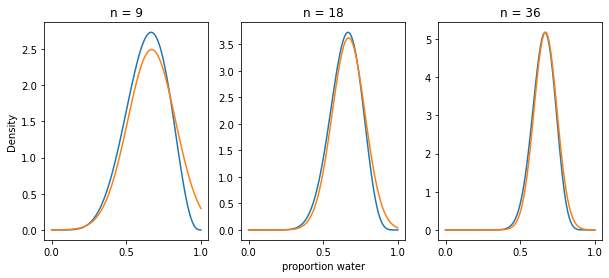

In [11]:
# Python code 2.7
# Figure 2.8
fig, axes = plt.subplots(nrows = 1, ncols = 3,
                        figsize=(10, 4))

x = np.linspace(0, 1, 100)
W = 2/3.0
L = 1/3.0
axes[0].plot(x, stats.beta.pdf(x, a=(9*W)+1, b=(9*L)+1))
axes[0].plot(x, stats.norm.pdf(x, .67, .16))
axes[0].set_title("n = 9")
axes[0].set_ylabel("Density")
axes[1].plot(x, stats.beta.pdf(x, a=(18*W)+1, b=(18*L)+1))
axes[1].plot(x, stats.norm.pdf(x, .67, .11))
axes[1].set_title("n = 18")
axes[1].set_xlabel("proportion water")
axes[2].plot(x, stats.beta.pdf(x, a=(36*W)+1, b=(36*L)+1))
axes[2].plot(x, stats.norm.pdf(x, .67, .077))
axes[2].set_title("n = 36")
for i in range(3):
    axes[i].set_xticks([0, .5, 1])
plt.show()

In [12]:
# Python code 2.8
n_samples = 10000
p = [None]*n_samples
p[0] = .5
W = 6
L = 3
for i in range(1,n_samples):
    p_new = stats.norm.rvs(loc = p[i-1], scale = .1, size = 1)[0]
    if p_new < 0:
        p_new = abs(p_new)
    if p_new > 1:
        p_new = 2 - p_new
    q0 = stats.binom.pmf(k = W, n = W+L, p=p[i-1])
    q1 = stats.binom.pmf(k = W, n = W+L, p=p_new)
    alpha = stats.uniform.rvs(0, 1, 1)[0]
    if alpha < q1/q0:
        p[i] = p_new
    else:
        p[i] = p[i-1]

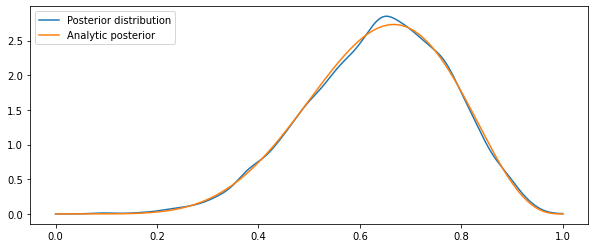

In [13]:
# Python code 2.9
x_seq = np.linspace(0, 1, 1000)
_density = stats.gaussian_kde(p)
y_post = _density.pdf(x_seq)
y_analytic = stats.beta.pdf(x_seq, W+1, L+1)
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x_seq, y_post, label = "Posterior distribution")
ax.plot(x_seq, y_analytic, label = "Analytic posterior")
plt.legend(loc="upper left")
plt.show()